<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-10-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [170]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative', 'death','totalTestResults']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative,death,totalTestResults
37,NY,335395,847603,21478,1182998
34,NJ,138532,173915,9255,312447
21,MA,77793,310596,4979,388389
16,IL,77741,352243,3406,429984
5,CA,66680,888984,2745,955664
41,PA,56611,227772,3707,284383
24,MI,47138,238540,4551,285678
10,FL,40596,498352,1791,538948
47,TX,38869,462907,1088,501776
7,CT,33554,96638,2967,130192


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CO'].groupby(['date'])

dfUSAPos = gbUSA[['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']].sum().reset_index().copy()
dfCAPos = gbCA[['positive', 'totalTestResults', 'death','positiveIncrease', 'deathIncrease']].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [172]:
dfUSAPos[-14:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,PCT
96,2020-04-27,981134,5593495,50354,20791.0,1190.0,0.741706
97,2020-04-28,1006137,5796273,52482,25003.0,2128.0,0.760608
98,2020-04-29,1033157,6026170,55182,27020.0,2700.0,0.781034
99,2020-04-30,1062503,6255769,57320,29346.0,2138.0,0.803218
100,2020-05-01,1095681,6552602,59059,33178.0,1739.0,0.828300
101,2020-05-02,1125719,6805241,60710,30038.0,1651.0,0.851008
102,2020-05-03,1152006,7053366,61868,26287.0,1158.0,0.870880
103,2020-05-04,1173453,7285374,62780,21447.0,912.0,0.887093
104,2020-05-05,1195605,7544328,65307,22152.0,2527.0,0.903839
105,2020-05-06,1220557,7786793,67256,24952.0,1949.0,0.922702


In [173]:
dfCAPos[-8:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,PCT
59,2020-05-03,16225,79906,832,457.0,12.0,0.837419
60,2020-05-04,16635,83090,842,410.0,10.0,0.858581
61,2020-05-05,16907,85004,851,272.0,9.0,0.872619
62,2020-05-06,17364,85976,903,457.0,52.0,0.896206
63,2020-05-07,17830,91347,921,466.0,18.0,0.920258
64,2020-05-08,18801,94536,961,971.0,40.0,0.970374
65,2020-05-09,18827,96772,960,26.0,-1.0,0.971716
66,2020-05-10,19375,100610,967,548.0,7.0,1.000000


In [174]:
gbUSA.sum()[-8:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-03,1152006,5901360,2812,50312.0,125796.0,9292.0,4502.0,4761.0,425.0,180152.0,61868,125796.0,7056178,7053366,7053366,1158.0,1936.0,221838.0,26287.0,248125.0
2020-05-04,1173453,6111921,2791,50062.0,127397.0,9366.0,4579.0,4848.0,430.0,187180.0,62780,127397.0,7288165,7285374,7285374,912.0,1601.0,210561.0,21447.0,232008.0
2020-05-05,1195605,6348723,2633,50906.0,129357.0,9348.0,4794.0,4818.0,439.0,189791.0,65307,129357.0,7546961,7544328,7544328,2527.0,1960.0,236802.0,22152.0,258954.0
2020-05-06,1220557,6566236,2742,50227.0,131477.0,9380.0,4911.0,4753.0,449.0,189910.0,67256,131477.0,7789535,7786793,7786793,1949.0,2120.0,226826.0,24952.0,242465.0
2020-05-07,1248137,6857376,3171,49130.0,135176.0,12137.0,5174.0,7070.0,529.0,195036.0,70002,135176.0,8108684,8105513,8105513,2746.0,3699.0,291140.0,27580.0,318720.0
2020-05-08,1275916,7132872,3307,47718.0,142037.0,11780.0,6294.0,6788.0,531.0,198993.0,71762,142037.0,8412095,8408788,8408788,1760.0,6861.0,275496.0,27779.0,303275.0
2020-05-09,1301095,7408535,3054,46637.0,147212.0,11496.0,6367.0,6551.0,543.0,212534.0,73291,147212.0,8712684,8709630,8709630,1529.0,5175.0,275663.0,25179.0,300842.0
2020-05-10,1322807,7664717,3095,44943.0,144780.0,11393.0,6445.0,6395.0,547.0,216169.0,74270,144780.0,8990619,8987524,8987524,979.0,1018.0,256182.0,21712.0,277894.0


In [175]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-06,17364,68612,0,792.0,2919.0,0.0,0.0,0.0,0.0,2801.0,903,2919.0,85976,85976,85976,52.0,81.0,515.0,457.0,972.0
2020-05-07,17830,73517,0,798.0,2986.0,0.0,0.0,0.0,0.0,2869.0,921,2986.0,91347,91347,91347,18.0,67.0,4905.0,466.0,5371.0
2020-05-08,18801,75735,0,821.0,3557.0,0.0,0.0,0.0,0.0,2869.0,961,3557.0,94536,94536,94536,40.0,571.0,2218.0,971.0,3189.0
2020-05-09,18827,77945,0,790.0,3600.0,0.0,0.0,0.0,0.0,2974.0,960,3600.0,96772,96772,96772,-1.0,43.0,2210.0,26.0,2236.0
2020-05-10,19375,81235,0,790.0,3623.0,0.0,0.0,0.0,0.0,3023.0,967,3623.0,100610,100610,100610,7.0,23.0,3290.0,548.0,3838.0


In [176]:
rn = gbCA.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

20.491494366398523

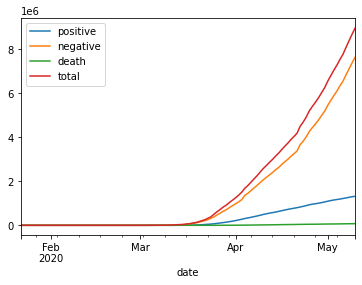

In [177]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [178]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
2020-04-27,931698,47980
2020-04-28,960916,49170
2020-04-29,983457,50492
2020-04-30,1003974,52428
2020-05-01,1035353,55337
2020-05-02,1067127,57406
2020-05-03,1093880,62406
2020-05-04,1125719,60710
2020-05-05,1154985,61906


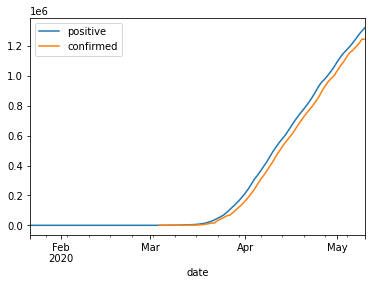

In [179]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [180]:
gbCA.sum()[-8:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-03,16225,63681,0,883.0,2793.0,0.0,0.0,0.0,0.0,2607.0,832,2793.0,79906,79906,79906,12.0,46.0,2500.0,457.0,2957.0
2020-05-04,16635,66455,0,883.0,2799.0,0.0,0.0,0.0,0.0,2650.0,842,2799.0,83090,83090,83090,10.0,6.0,2774.0,410.0,3184.0
2020-05-05,16907,68097,0,834.0,2838.0,0.0,0.0,0.0,0.0,2743.0,851,2838.0,85004,85004,85004,9.0,39.0,1642.0,272.0,1914.0
2020-05-06,17364,68612,0,792.0,2919.0,0.0,0.0,0.0,0.0,2801.0,903,2919.0,85976,85976,85976,52.0,81.0,515.0,457.0,972.0
2020-05-07,17830,73517,0,798.0,2986.0,0.0,0.0,0.0,0.0,2869.0,921,2986.0,91347,91347,91347,18.0,67.0,4905.0,466.0,5371.0
2020-05-08,18801,75735,0,821.0,3557.0,0.0,0.0,0.0,0.0,2869.0,961,3557.0,94536,94536,94536,40.0,571.0,2218.0,971.0,3189.0
2020-05-09,18827,77945,0,790.0,3600.0,0.0,0.0,0.0,0.0,2974.0,960,3600.0,96772,96772,96772,-1.0,43.0,2210.0,26.0,2236.0
2020-05-10,19375,81235,0,790.0,3623.0,0.0,0.0,0.0,0.0,3023.0,967,3623.0,100610,100610,100610,7.0,23.0,3290.0,548.0,3838.0


In [181]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1329260
dead           79526
dtype: int64

In [182]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    67600
dead          2716
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [184]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1329260
Spain              224350
United Kingdom     220449
Italy              219070
Russia             209688
France             177094
Germany            171879
Brazil             162699
Turkey             138657
Iran               107603
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [189]:
dfState.loc['FL'].head(7)

,date,positive,death,current_total,pct
state,,,,,
FL,2020-05-10,40596,1791,40596,1.000000
FL,2020-05-09,40001,1785,40596,0.985343
FL,2020-05-08,39199,1738,40596,0.965588
FL,2020-05-07,38828,1667,40596,0.956449
FL,2020-05-06,38002,1605,40596,0.936102
FL,2020-05-05,37439,1536,40596,0.922234
FL,2020-05-04,36897,1423,40596,0.908883


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

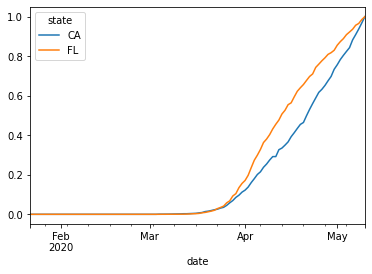

In [191]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

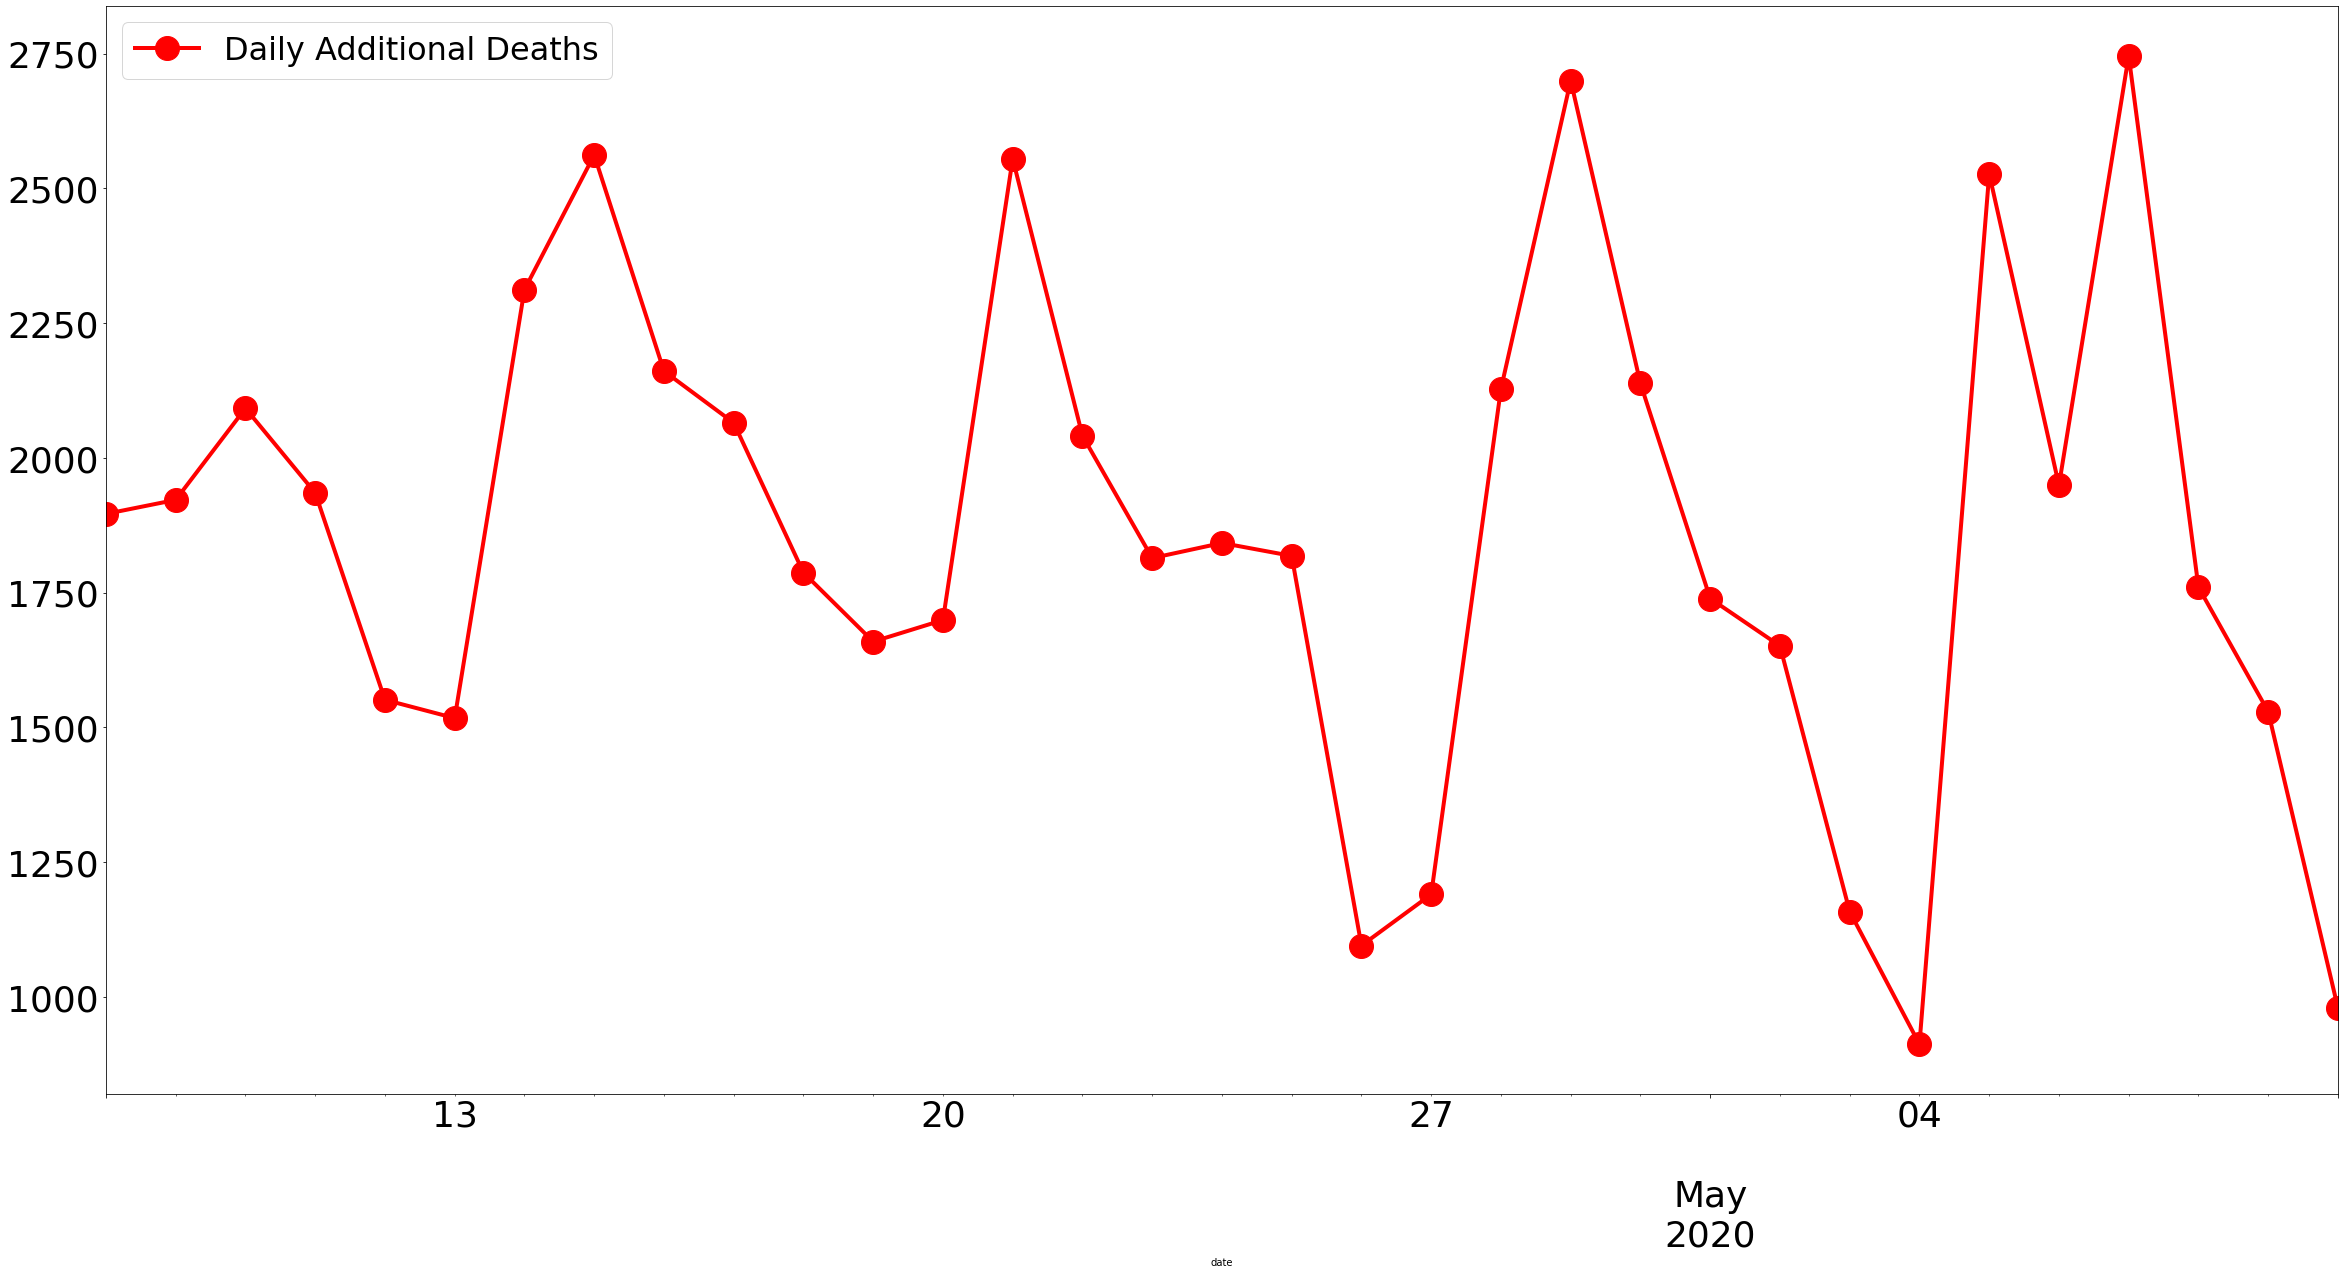

In [193]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


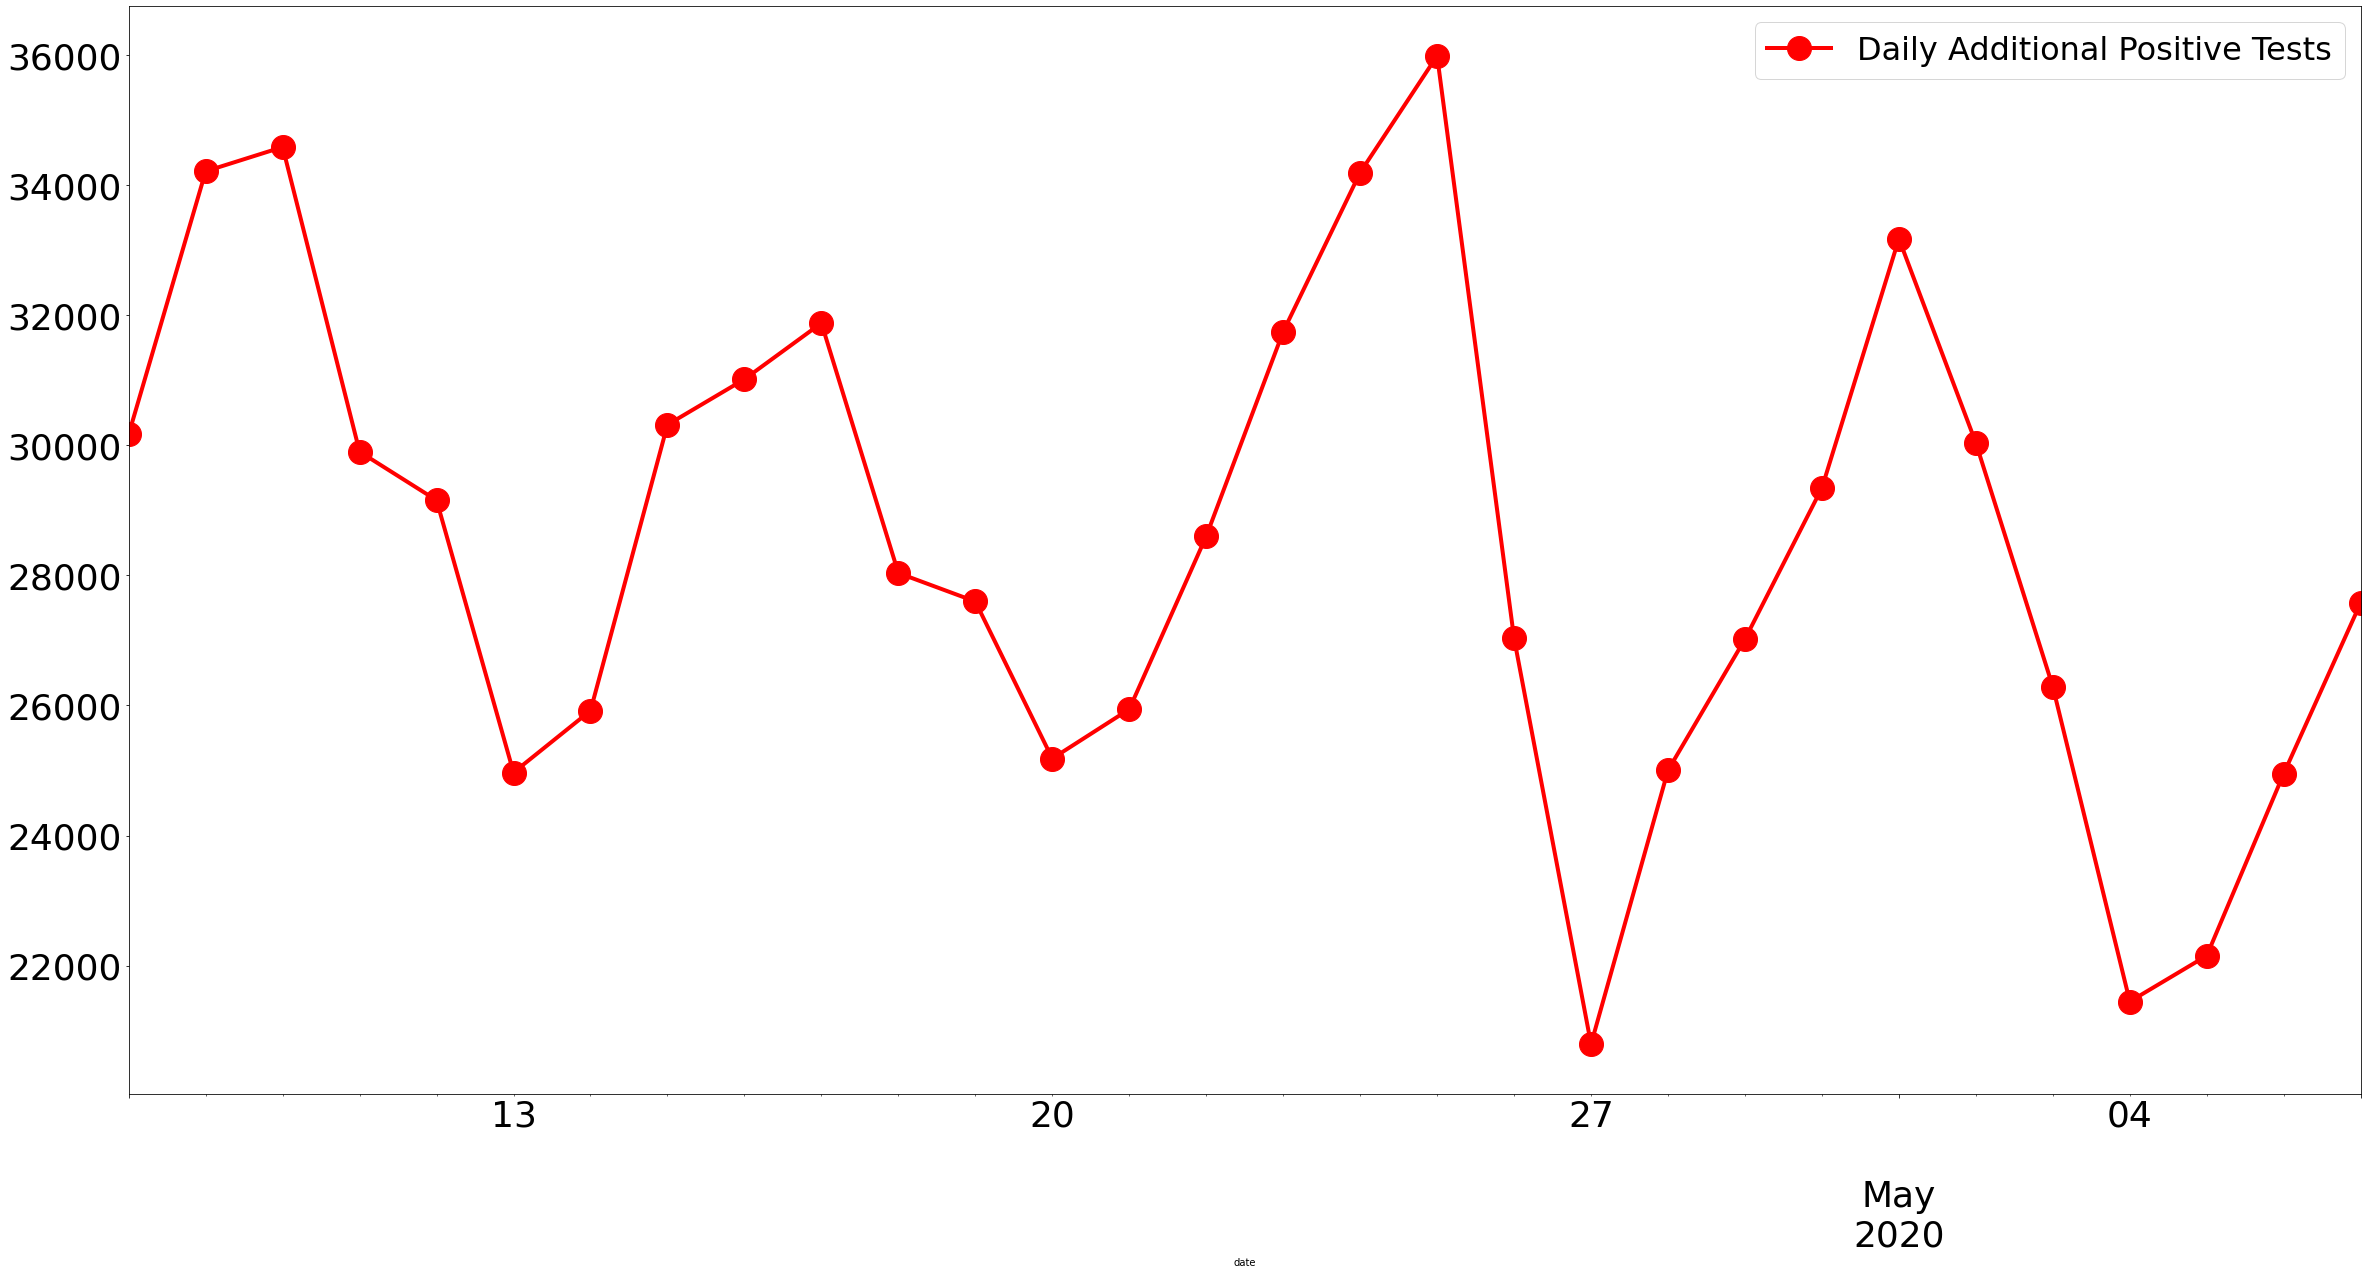

In [194]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:-3].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


In [197]:
dfDoW.sum().deathIncrease



0     7186.0
1    12474.0
2    12357.0
3    12216.0
4    11135.0
5    10592.0
6     8310.0
Name: deathIncrease, dtype: float64

In [199]:
dfByWeekYear.sum()[:-1]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202004,0.0,0.0,0.0,0.0,0.0
202005,0.0,0.0,0.0,0.0,0.0
202006,0.0,0.0,0.0,1.0,1.0
202007,0.0,0.0,0.0,0.0,0.0
202008,0.0,0.0,0.0,0.0,0.0
202009,8.0,0.0,81.0,28.0,109.0
202010,23.0,0.0,2821.0,595.0,3416.0
202011,46.0,0.0,30203.0,4113.0,34316.0
202012,360.0,2498.0,179297.0,31483.0,210780.0
202013,2090.0,13766.0,497952.0,107963.0,605915.0


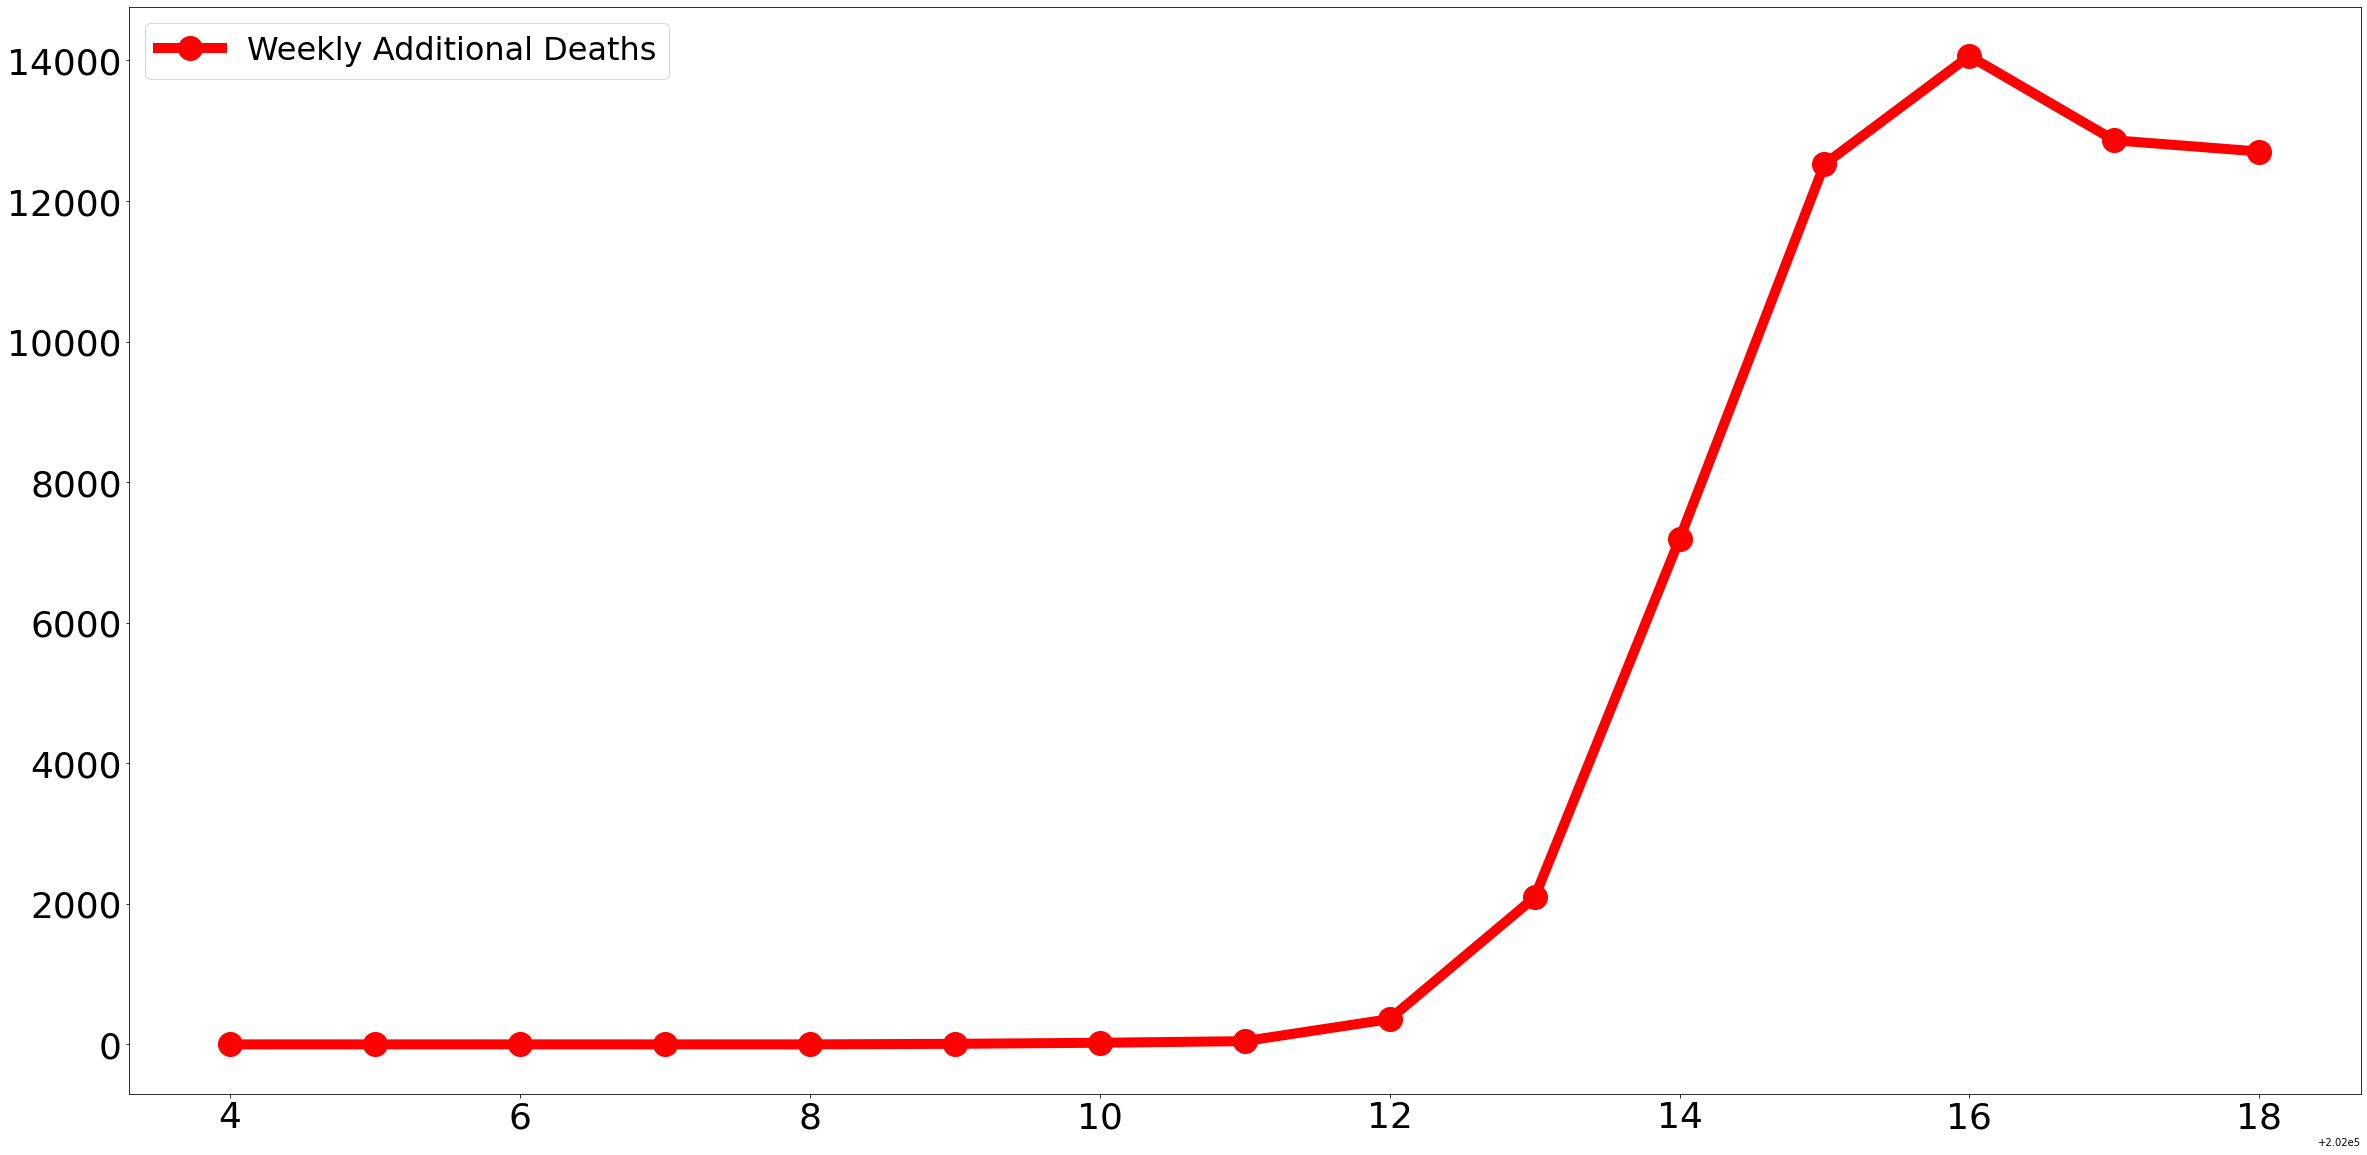

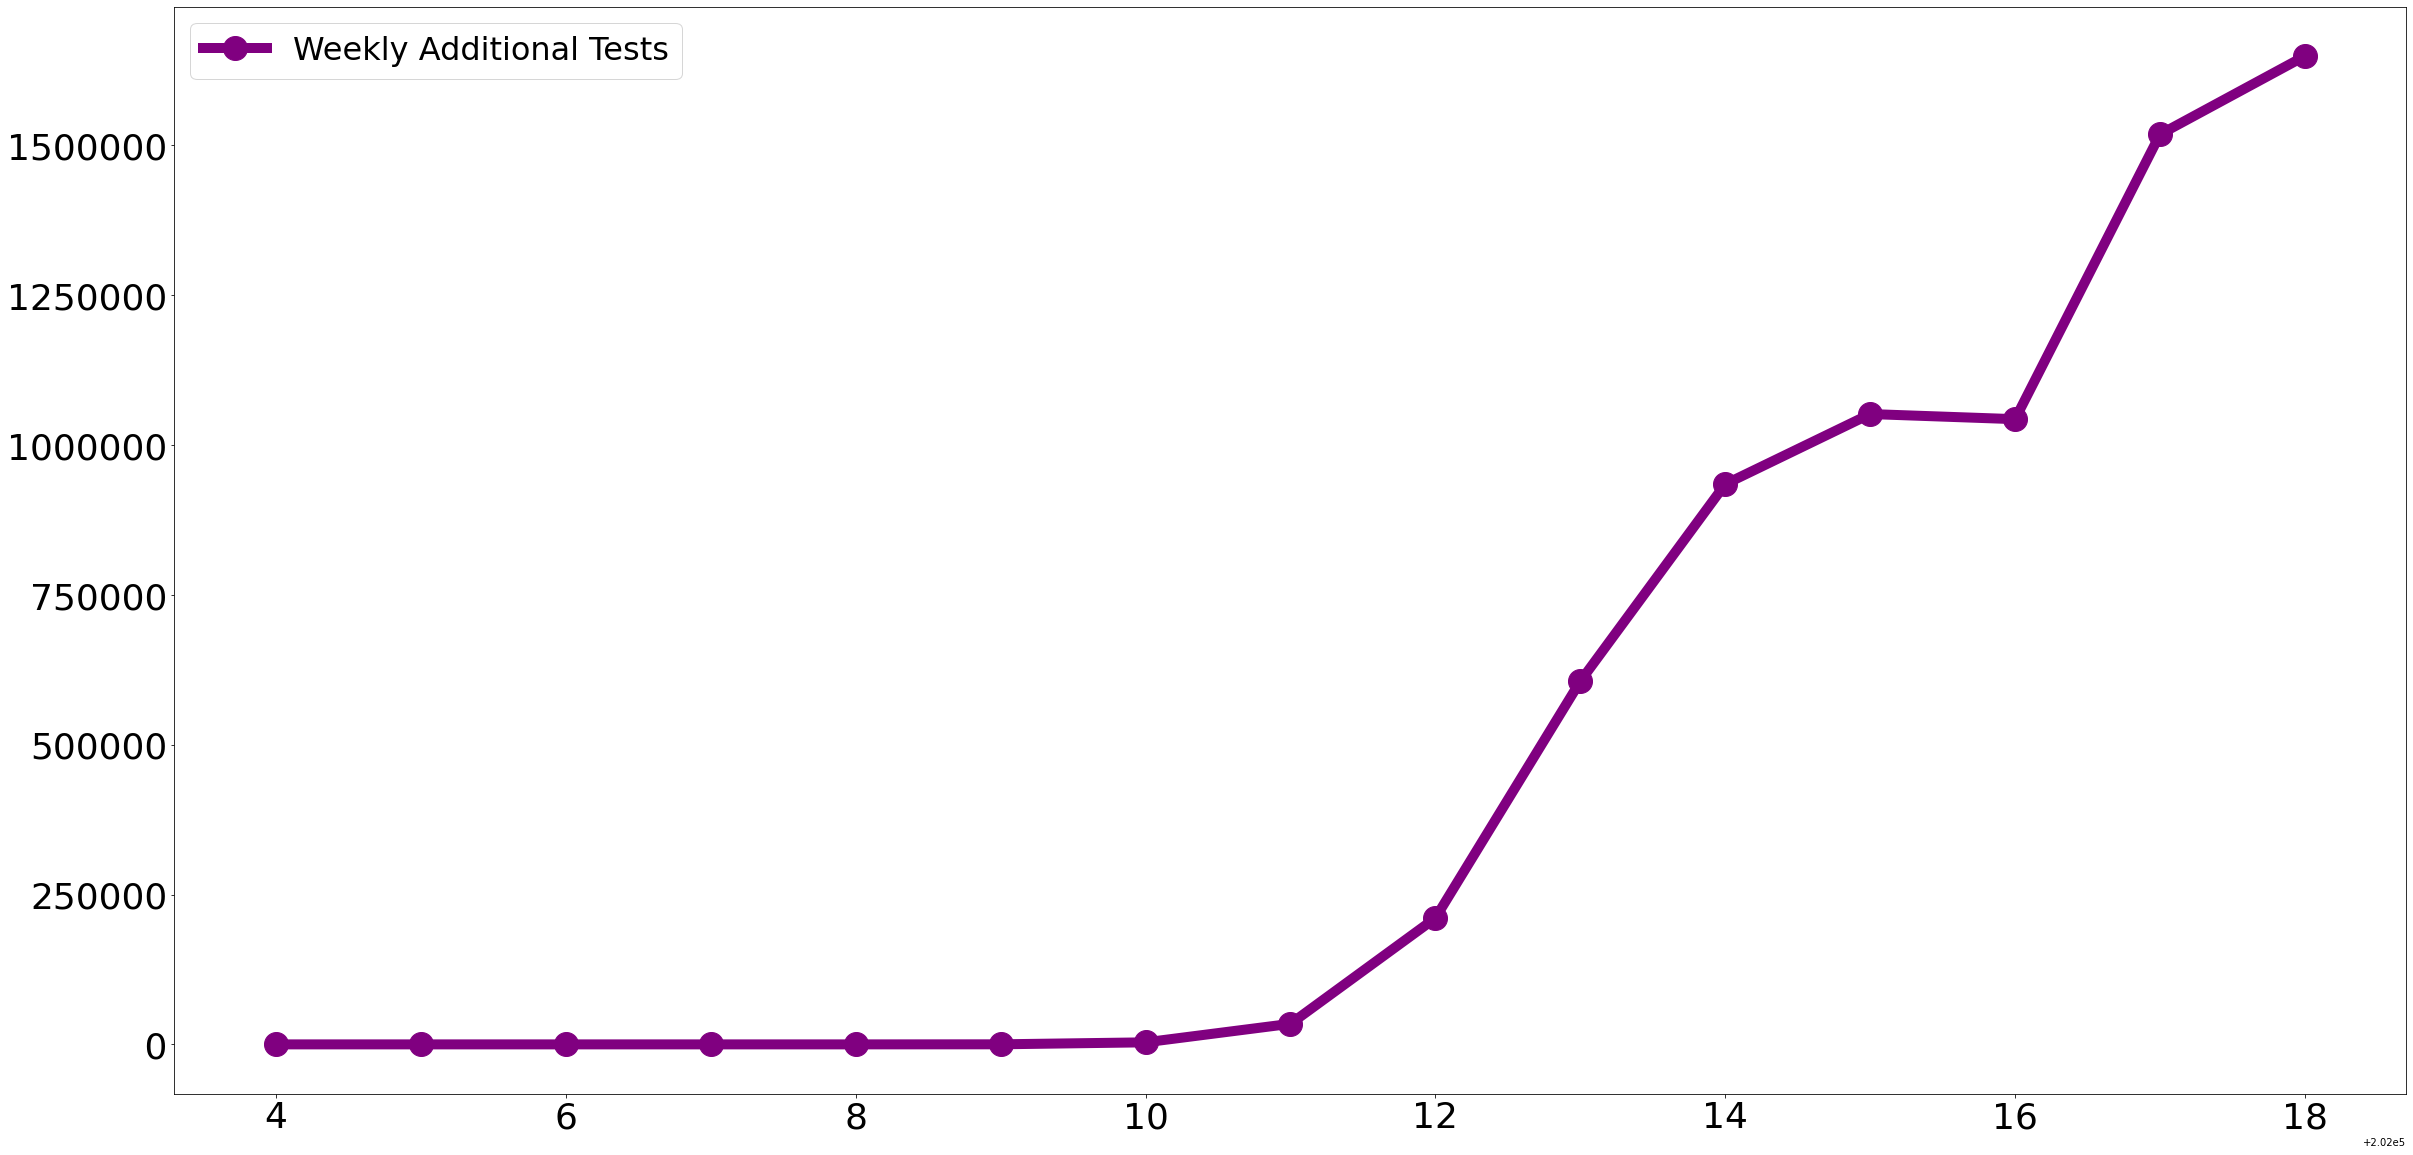

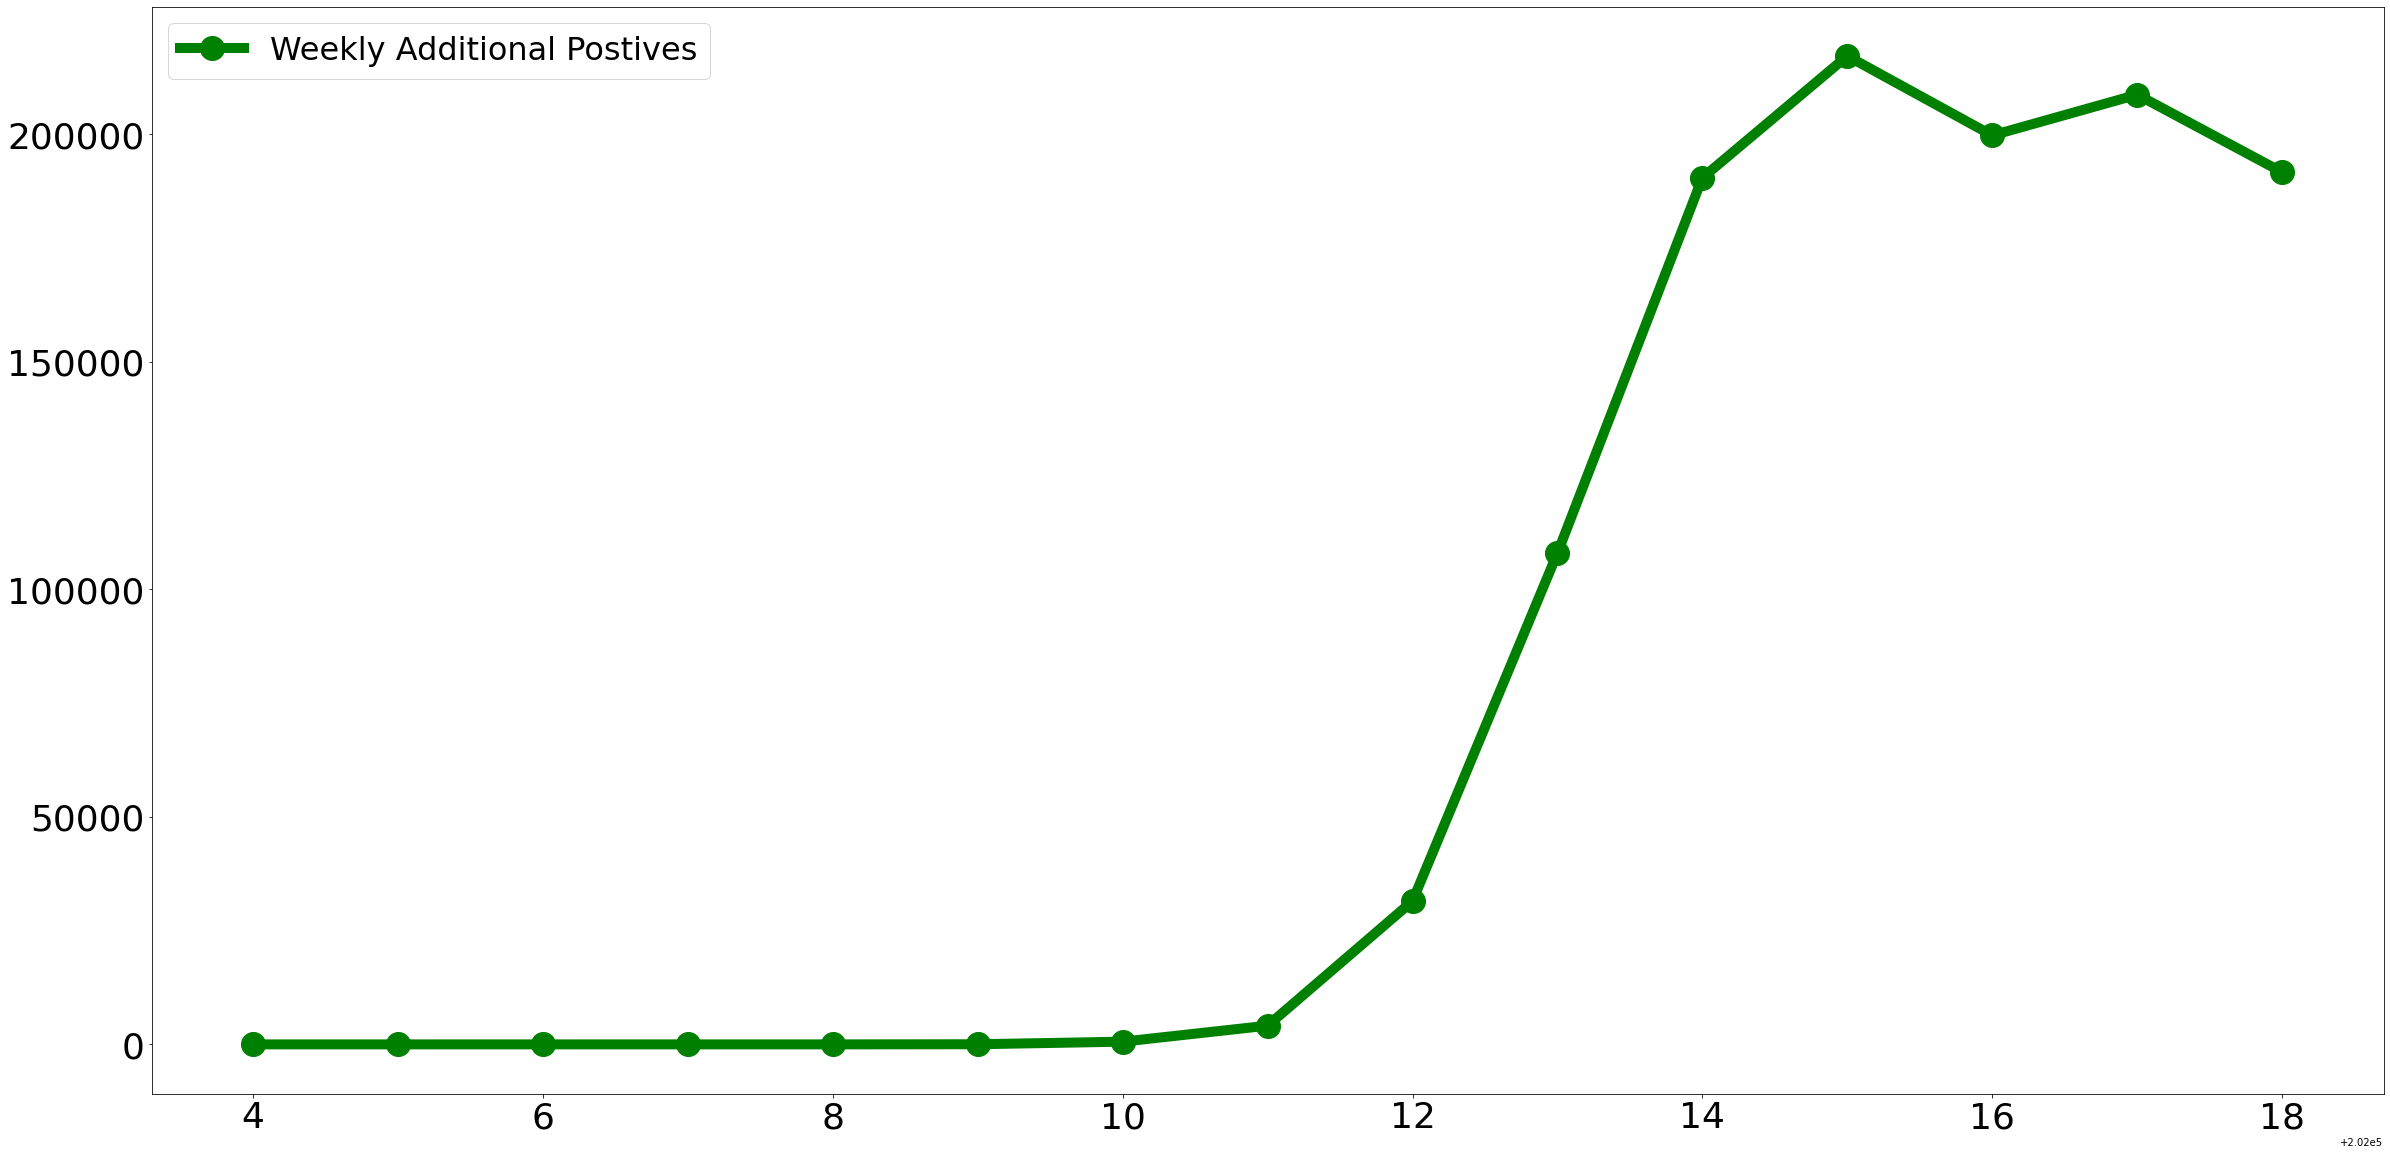

In [200]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

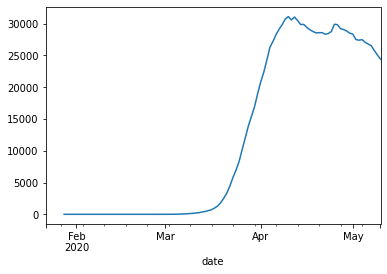

In [201]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

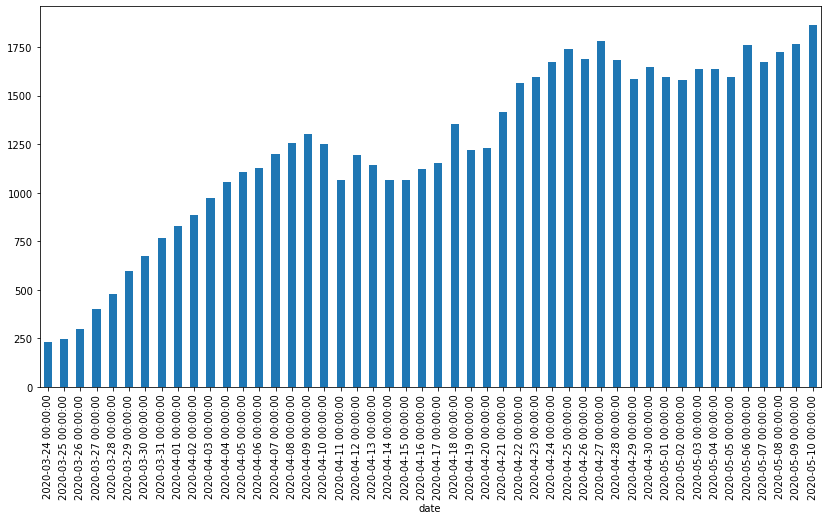

In [203]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


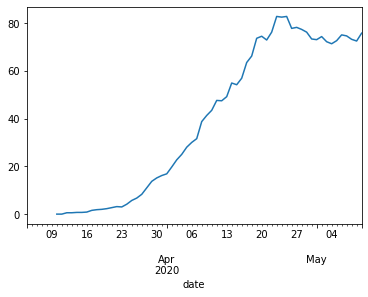

In [204]:
dfCAAvg.deathIncrease.plot.line()

In [205]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,death,current_total,pct
654,FL,2020-05-10,40596,1791,40596,1.000000
655,FL,2020-05-09,40001,1785,40596,0.985343
656,FL,2020-05-08,39199,1738,40596,0.965588
657,FL,2020-05-07,38828,1667,40596,0.956449
658,FL,2020-05-06,38002,1605,40596,0.936102
659,FL,2020-05-05,37439,1536,40596,0.922234
660,FL,2020-05-04,36897,1423,40596,0.908883
661,FL,2020-05-03,36078,1403,40596,0.888708
662,FL,2020-05-02,35463,1388,40596,0.873559
663,FL,2020-05-01,34728,1314,40596,0.855454


In [206]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=5)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .7)].sort_values(by='pct')


,state,date,positive,death,current_total,pct
1641,MN,2020-05-05,7851,455,11271,0.696566


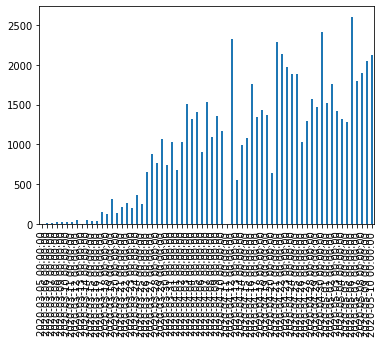

In [207]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar()



# Added State Data

In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [210]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive    1322807
negative    7664717
pending        3095
death         74270
total       8990619
dtype: int64
Current Infection Rate 14.713192%
Percentage of US affected: 0.425627%
Observed CFR: 5.614576%
Percentage of US tested/affected: 2.760726%
Projected affected by cir = 48,294,510
Projected killed = 2,711,532


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [218]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.724080,6.081139
NJ,1.559660,3.517680
MA,1.128661,5.634949
RI,1.064226,8.610190
CT,0.941130,3.651656
DC,0.888701,4.189875
LA,0.679746,4.643613
DE,0.662070,3.187528
IL,0.613495,3.393230


In [219]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 2.738099%


In [220]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [222]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  16319 non-null  object 
 1   location                  16383 non-null  object 
 2   date                      16383 non-null  object 
 3   total_cases               16383 non-null  int64  
 4   new_cases                 16383 non-null  int64  
 5   total_deaths              16383 non-null  int64  
 6   new_deaths                16383 non-null  int64  
 7   total_cases_per_million   16078 non-null  float64
 8   new_cases_per_million     16078 non-null  float64
 9   total_deaths_per_million  16078 non-null  float64
 10  new_deaths_per_million    16078 non-null  float64
 11  total_tests               4197 non-null   float64
 12  new_tests                 3763 non-null   float64
 13  total_tests_per_thousand  4197 non-null   float64
 14  new_te

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [225]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    8709630.0
RUS    5448463.0
DEU    2755770.0
ITA    2514234.0
ESP    1625211.0
         ...    
PRY      14646.0
CRI      11276.0
MMR      10848.0
ZWE       8741.0
BOL       8523.0
Name: total_tests, Length: 84, dtype: float64

In [226]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 31617122
Total tests done in USA : 8709630
How many more times has the world tested more than the US: 3.6


In [227]:
dfOwidLatest[isUSA].sum()

location                                                  United States
date                                                         2020-05-09
total_cases                                                     1283929
new_cases                                                         26957
total_deaths                                                      77180
new_deaths                                                         1510
total_cases_per_million                                         3878.91
new_cases_per_million                                             81.44
total_deaths_per_million                                         233.17
new_deaths_per_million                                            4.562
total_tests                                                 8.70963e+06
new_tests                                                        300842
total_tests_per_thousand                                         26.313
new_tests_per_thousand                                          

In [228]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-14:]

,new_cases,new_deaths
date,,
2020-04-27,26857,1687
2020-04-28,22541,1369
2020-04-29,24132,2110
2020-04-30,27326,2611
2020-05-01,29917,2040
2020-05-02,33955,2062
2020-05-03,29288,1317
2020-05-04,24972,1297
2020-05-05,22593,1252


In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state].set_index('date')\
.rolling(window=7).sum()


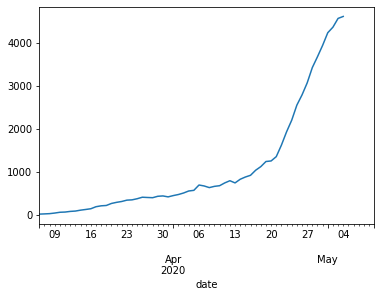

In [230]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [231]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

40596

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'].set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [233]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,208.0,715.0,20005.0,3811.0,23816.0
1,355.0,1218.0,39541.0,5795.0,45336.0
2,247.0,1438.0,21047.0,5634.0,26681.0
3,181.0,815.0,32586.0,4532.0,37118.0
4,236.0,968.0,42359.0,5962.0,48321.0
5,113.0,631.0,33071.0,3970.0,37041.0
6,65.0,212.0,21497.0,3735.0,25232.0
